In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [2]:
# Import ploting library 
import matplotlib.pyplot as plt

In [3]:
# Read data and show stats
star_data = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


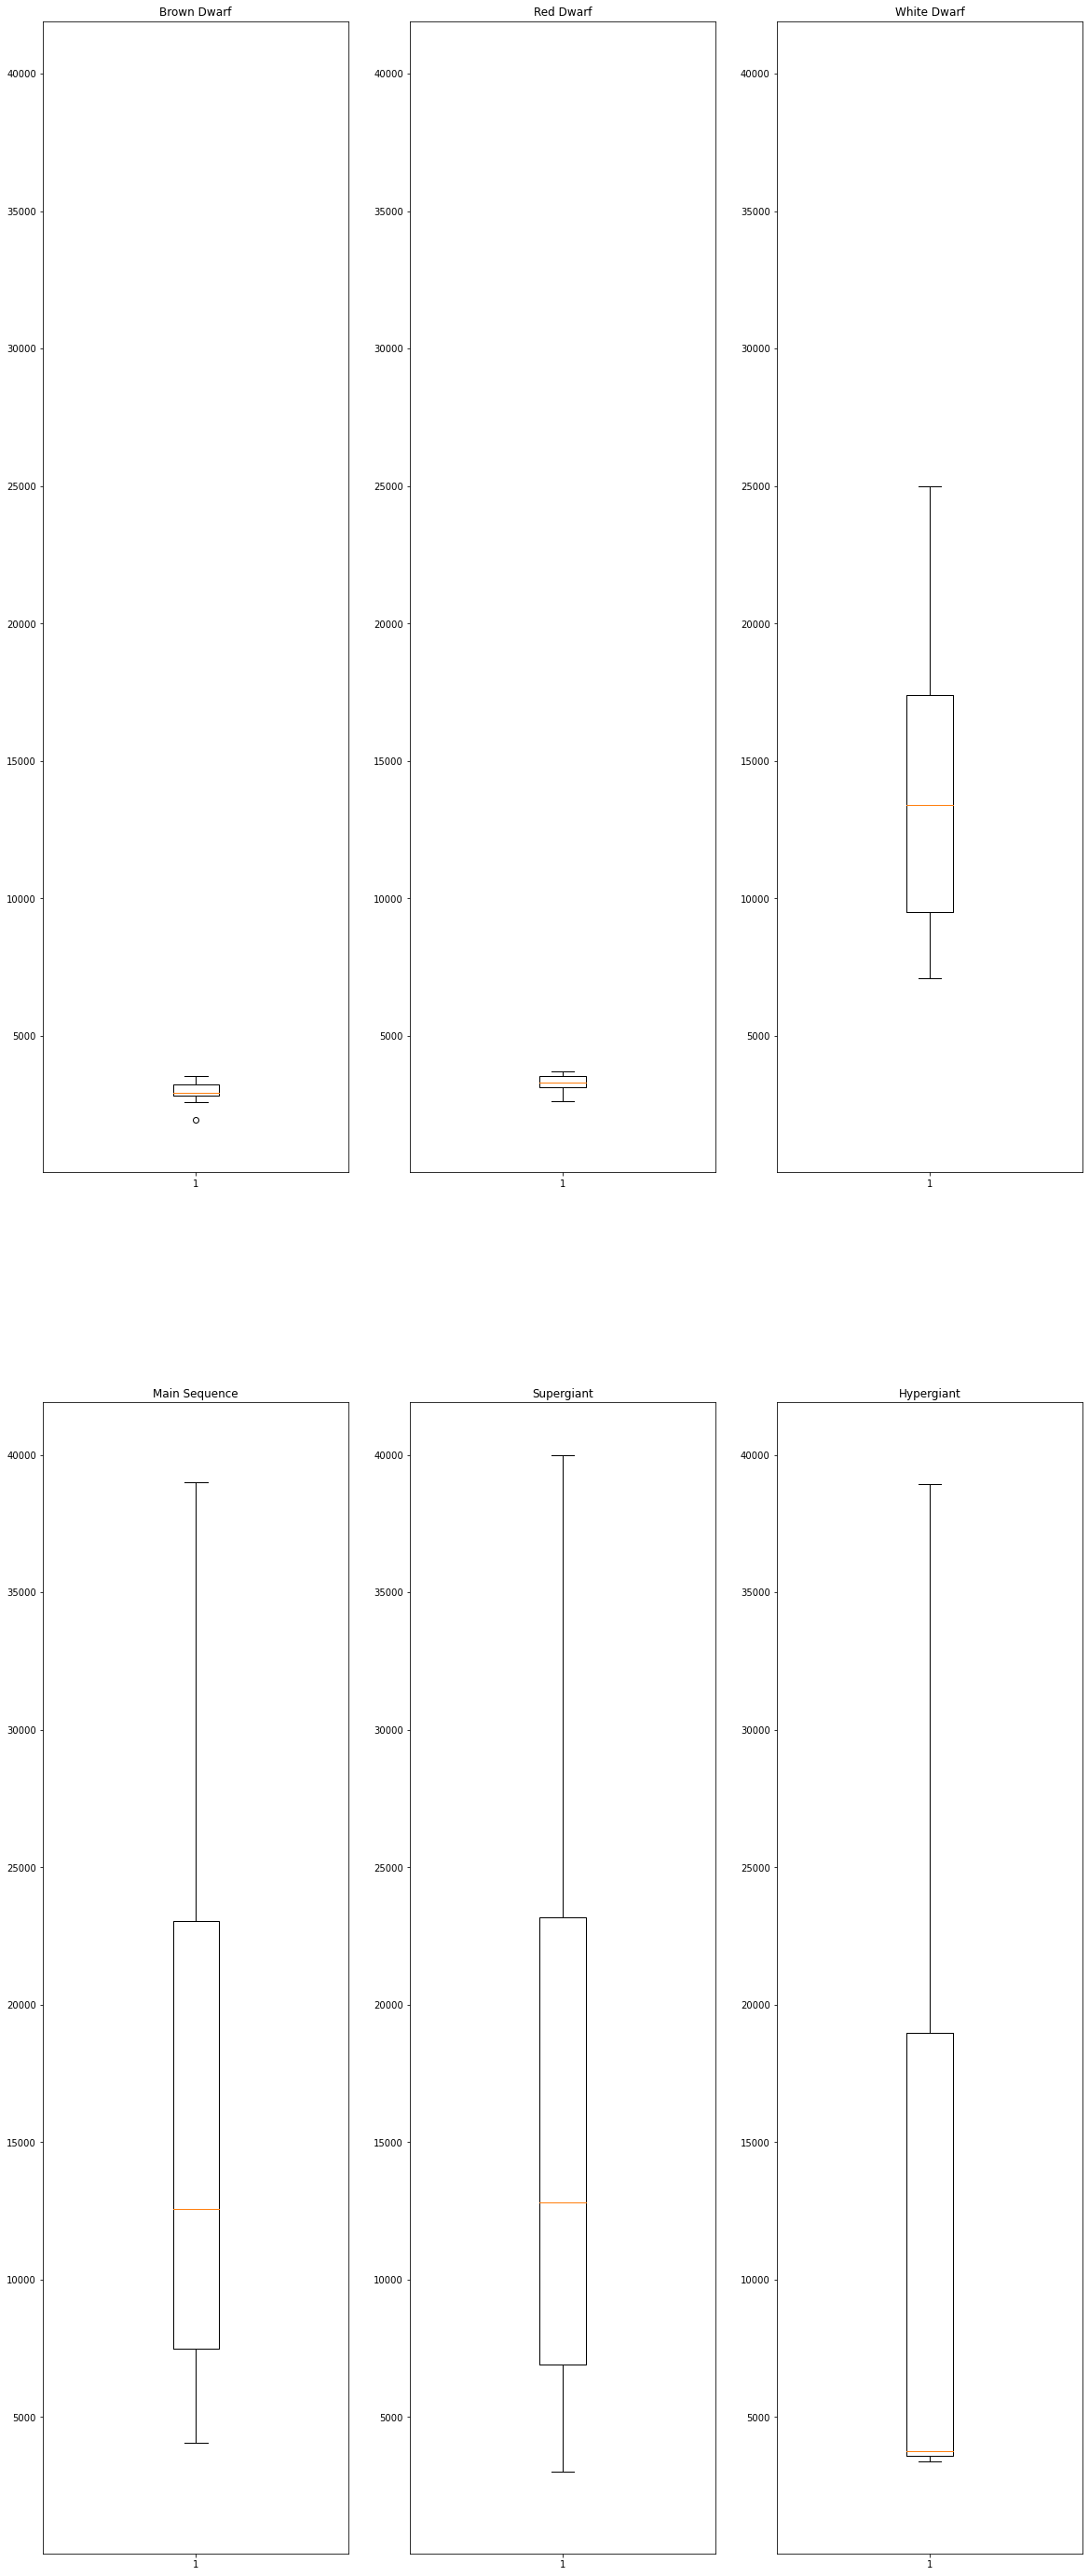

In [4]:
# plt.scatter(star_data["Luminosity(L/Lo)"], star_data["Absolute magnitude(Mv)"])
plt.figure(figsize=(20,50))

# c = "#331c20"
ax = plt.subplot(2,3,1) # 2 Row, 3 Columns, index 1
plt.boxplot(star_data[star_data["Star type"] == 0]["Temperature (K)"])
plt.title("Brown Dwarf")

plt.subplot(2,3,2,sharey=ax) # 2 Row, 3 Columns, index 2
plt.boxplot(star_data[star_data["Star type"] == 1]["Temperature (K)"])
plt.title("Red Dwarf")

plt.subplot(2,3,3, sharey=ax) # 2 Row, 3 Columns, index 3
plt.boxplot(star_data[star_data["Star type"] == 2]["Temperature (K)"])
plt.title("White Dwarf")

plt.subplot(2,3,4, sharey=ax) # 2 Row, 3 Columns, index 4
plt.boxplot(star_data[star_data["Star type"] == 3]["Temperature (K)"])
plt.title("Main Sequence")

plt.subplot(2,3,5, sharey=ax) # 2 Row, 3 Columns, index 5
plt.boxplot(star_data[star_data["Star type"] == 4]["Temperature (K)"])
plt.title("Supergiant")

plt.subplot(2,3,6, sharey=ax) # 2 Row, 3 Columns, index 6
plt.boxplot(star_data[star_data["Star type"] == 5]["Temperature (K)"])
plt.title("Hypergiant")

plt.show()